In [2]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()

# data parameters
args.image_folder = "images" # the folder where the images are stored, ensure they should be stored in a subfolder e.g. images/1/...png


args.batch_size = 400
args.shuffle = True  #shuffle the dataset
args.image_size = [64,64] #resize the images to this resolution


# performance parameters
args.num_workers = 10
args.prefetch_factor = 2
args.device = "cuda:0" # to run on cpu, change cuda to cpu


# train parameters
args.weight_decay = 0
args.lr = 5e-4
args.optimizer = "adam"
args.epochs = 2000

args.reconstruction_weight = 1
args.variational_beta = 1
args.edge_multiplier = 1
args.disc_weight =40

args.kl_warmup = -1
args.generator_warmup = 20 #allows the generator to warm up for n epochs


args.loss_fn = "gan" # edge,kl


# model parameters
## encoder
args.encoder_channels = [64,128,256,512]
args.encoder_activation = "leaky-relu"
args.encoder_activation_params = (0.2,)

args.encoder_padding = 1 #can also be a list
args.encoder_stride = 2 #can also be a list
args.encoder_dilation = 1 #can also be a list
args.encoder_kernel_size = 4 #can also be a list

## decoder
args.decoder_channels = [512,256,128,64]
args.decoder_activation = "leaky-relu"
args.decoder_activation_params = (0.2,)

args.decoder_padding = 1 #can also be a list
args.decoder_stride = 2 #can also be a list
args.decoder_dilation =1 #can also be a list
args.decoder_kernel_size = 4 #can also be a list
args.decoder_output_padding = 0 #can also be a list

##discriminator
# model parameters
args.discriminator_channels = [32,64,64,64]
args.discriminator_activation = "leaky-relu"
args.discriminator_activation_params = (0.2,)

args.discriminator_padding = 1 #can also be a list
args.discriminator_stride = 2 #can also be a list
args.discriminator_dilation = 1 #can also be a list
args.discriminator_kernel_size = 4 #can also be a list


## vae
args.latent_dims = 40


# environment
args.model_name = "vae"
args.path = "checkpoints"
args.print_loss = True
args.save_model = True
args.save_model_epoch = 200
args.print_conv_shapes = True
args.pretrained_model = "1999-vae-gan-[64, 64].pt"
args.plot_image_every = 50

In [3]:
import os.path
from os import path
if not path.exists(args.image_folder):
    print("image folder not found, these files are found: ",os.listdir())

In [4]:
#encoder checks
if not isinstance(args.encoder_padding,list):args.encoder_padding = [args.encoder_padding]*len(args.encoder_channels)
assert len(args.encoder_padding) == len(args.encoder_channels)

if not isinstance(args.encoder_activation,list):args.encoder_activation = [args.encoder_activation]*len(args.encoder_channels)
assert len(args.encoder_activation) == len(args.encoder_channels)

if not isinstance(args.encoder_stride,list):args.encoder_stride = [args.encoder_stride]*len(args.encoder_channels)
assert len(args.encoder_stride) == len(args.encoder_channels)

if not isinstance(args.encoder_dilation,list):args.encoder_dilation = [args.encoder_dilation]*len(args.encoder_channels)
assert len(args.encoder_dilation) == len(args.encoder_channels)

if not isinstance(args.encoder_kernel_size,list):args.encoder_kernel_size = [args.encoder_kernel_size]*len(args.encoder_channels)
assert len(args.encoder_kernel_size) == len(args.encoder_channels)

if not isinstance(args.encoder_activation_params,list):args.encoder_activation_params = [args.encoder_activation_params]*len(args.encoder_channels)
assert len(args.encoder_activation_params) == len(args.encoder_channels)


#decoder checks
if not isinstance(args.decoder_padding,list):args.decoder_padding = [args.decoder_padding]*len(args.decoder_channels)
assert len(args.decoder_padding) == len(args.decoder_channels)

if not isinstance(args.decoder_activation,list):args.decoder_activation = [args.decoder_activation]*len(args.decoder_channels)
assert len(args.decoder_activation) == len(args.decoder_channels)

if not isinstance(args.decoder_stride,list):args.decoder_stride = [args.decoder_stride]*len(args.decoder_channels)
assert len(args.decoder_stride) == len(args.decoder_channels)

if not isinstance(args.decoder_dilation,list):args.decoder_dilation = [args.decoder_dilation]*len(args.decoder_channels)
assert len(args.decoder_dilation) == len(args.decoder_channels)

if not isinstance(args.decoder_kernel_size,list):args.decoder_kernel_size = [args.decoder_kernel_size]*len(args.decoder_channels)
assert len(args.decoder_kernel_size) == len(args.decoder_channels)

if not isinstance(args.decoder_activation_params,list):args.decoder_activation_params = [args.decoder_activation_params]*len(args.encoder_channels)
assert len(args.decoder_activation_params) == len(args.encoder_channels)

if not isinstance(args.decoder_output_padding,list):args.decoder_output_padding = [args.decoder_output_padding]*len(args.encoder_channels)
assert len(args.decoder_output_padding) == len(args.encoder_channels)


#discriminator checks
if not isinstance(args.discriminator_padding,list):args.discriminator_padding = [args.discriminator_padding]*len(args.discriminator_channels)
assert len(args.discriminator_padding) == len(args.discriminator_channels)

if not isinstance(args.discriminator_activation,list):args.discriminator_activation = [args.discriminator_activation]*len(args.discriminator_channels)
assert len(args.discriminator_activation) == len(args.discriminator_channels)

if not isinstance(args.discriminator_stride,list):args.discriminator_stride = [args.discriminator_stride]*len(args.discriminator_channels)
assert len(args.discriminator_stride) == len(args.discriminator_channels)

if not isinstance(args.discriminator_dilation,list):args.discriminator_dilation = [args.discriminator_dilation]*len(args.discriminator_channels)
assert len(args.discriminator_dilation) == len(args.discriminator_channels)

if not isinstance(args.discriminator_kernel_size,list):args.discriminator_kernel_size = [args.discriminator_kernel_size]*len(args.discriminator_channels)
assert len(args.discriminator_kernel_size) == len(args.discriminator_channels)

if not isinstance(args.discriminator_activation_params,list):args.discriminator_activation_params = [args.discriminator_activation_params]*len(args.discriminator_channels)
assert len(args.discriminator_activation_params) == len(args.discriminator_channels)

In [5]:
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

import torch
from torch import nn
import torch.nn.functional as F

import numpy as np
import math

import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
!pip install kornia
import kornia

/opt/conda/lib/python3.8/site-packages/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


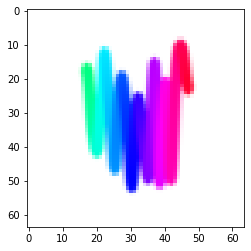

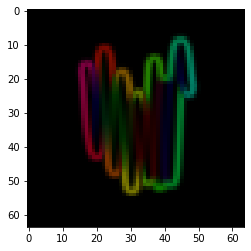

In [6]:
# display the edge detection

data_transforms = transforms.Compose([
     transforms.Resize(args.image_size),
     transforms.ToTensor(),
])
image_folder = ImageFolder(args.image_folder,data_transforms)

img = image_folder[0][0]

plt.imshow(img.permute(1,2,0))
plt.show()
img_grads = kornia.sobel(img.unsqueeze(0)).squeeze()

plt.imshow(img_grads.permute(1,2,0))



In [7]:
class MultiEpochsDataLoader(torch.utils.data.DataLoader):
    # solves the reinitialization/respawning of the dataset after evey epoch
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._DataLoader__initialized = False
        self.batch_sampler = _RepeatSampler(self.batch_sampler)
        self._DataLoader__initialized = True
        self.iterator = super().__iter__()

    def __len__(self):
        return len(self.batch_sampler.sampler)

    def __iter__(self):
        for i in range(len(self)):
            yield next(self.iterator)
    
    def __del__(self):
        self.iterator._shutdown_workers()
        self.iterator.__del__()
        del self.batch_sampler       

class _RepeatSampler(object):
    """ Sampler that repeats forever.
    Args:
        sampler (Sampler)
    """

    def __init__(self, sampler):
        self.sampler = sampler

    def __iter__(self):
        while True:
            yield from iter(self.sampler)

            

def get_loader(args,num_workers=None):
    data_transforms = transforms.Compose([
         transforms.Resize(args.image_size),
         transforms.ToTensor(),
    ])
    
    image_folder = ImageFolder(args.image_folder,data_transforms)
    
    loader_params = {"batch_size":args.batch_size,
                    "shuffle":args.shuffle,
                     "num_workers":args.num_workers if num_workers==None else num_workers
                    }
    if args.num_workers > 0 and num_workers != 0:
        loader_params['prefetch_factor'] = args.prefetch_factor
    
    data_loader = MultiEpochsDataLoader(image_folder,
                                          **loader_params)
    return data_loader

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def conv_output_shape(h_w, kernel_size=1, stride=1, padding=0, dilation=1):
    """
    Utility function for computing output of convolutions
    takes a tuple of (h,w) and returns a tuple of (h,w)
    """
    
    
    if not isinstance(h_w, (tuple,list)):
        h_w = (h_w, h_w)
    
    if not isinstance(kernel_size, (tuple,list)):
        kernel_size = (kernel_size, kernel_size)
    
    if not isinstance(stride, (tuple,list)):
        stride = (stride, stride)
    
    if not isinstance(padding, (tuple,list)):
        padding = (padding, padding)
        
    if not isinstance(dilation, (tuple,list)):
        dilation = (dilation, dilation)  
    
    h = (h_w[0] + (2 * padding[0]) - (dilation[0] * (kernel_size[0] - 1)) - 1)// stride[0] + 1
    w = (h_w[1] + (2 * padding[1]) - (dilation[1] * (kernel_size[1] - 1)) - 1)// stride[1] + 1
    
    return h, w


def convtransp2d_output_shape(h_w, kernel_size=1, stride=1, padding=0, dilation=1,output_padding=0):
    """
    Utility function for computing output of convolutions
    takes a tuple of (h,w) and returns a tuple of (h,w)
    """
    
    
    if not isinstance(h_w, (tuple,list)):
        h_w = (h_w, h_w)
    
    if not isinstance(kernel_size, (tuple,list)):
        kernel_size = (kernel_size, kernel_size)
    
    if not isinstance(stride, (tuple,list)):
        stride = (stride, stride)
    
    if not isinstance(padding, (tuple,list)):
        padding = (padding, padding)
    
    
    if not isinstance(output_padding, (tuple,list)):
        output_padding = (output_padding, output_padding)
    
    if not isinstance(dilation, (tuple,list)):
        dilation = (dilation, dilation)
    
    h = (h_w[0] - 1)*stride[0] - 2*padding[0] + dilation[0]*(kernel_size[0]-1) + output_padding[0] + 1
    w = (h_w[1] - 1)*stride[1] - 2*padding[1] + dilation[1]*(kernel_size[1]-1) + output_padding[1] + 1
   
    return h, w


def get_models(args):
    """this function builds and loads a VAE from the settings, allowing for modular model building"""
    class Encoder(nn.Module):
        def __init__(self):
            super(Encoder, self).__init__()
            
            
            
            encoder_modules = []
            input_shape = args.image_size
            
            #Store this to track the chonnel growth over the layers
            self.in_channel_size = [3]
            
            #We store the output shape of the conv2 module, to ensure it matches with the deconv layer
            self.layer_shapes = [args.image_size]
            
            #iterate over all channels to build the model
            for i,channel_size in enumerate(args.encoder_channels):
                
                #build a list of conv2d modules
                encoder_modules.append(
                    nn.Conv2d(
                        in_channels = self.in_channel_size[-1],
                        out_channels = channel_size,
                        kernel_size = args.encoder_kernel_size[i], 
                        stride = args.encoder_stride[i], 
                        padding =args.encoder_padding[i], 
                        dilation = args.encoder_dilation[i])
                )
                
                #add an activation function after every conv layer
                if args.encoder_activation[i] == "relu":
                    encoder_modules.append(nn.ReLU())
                elif args.encoder_activation[i] == "leaky-relu":
                    encoder_modules.append(nn.LeakyReLU(*args.encoder_activation_params[i]))
                # TODO: add more cases to allow for different functions
                
                #we store the last channel_size, so we can match it on the next iteration
                self.in_channel_size.append(channel_size)

                #automatically calculate the new image shapes
                self.layer_shapes.append(
                    conv_output_shape(
                        h_w = self.layer_shapes[-1], 
                        padding = args.encoder_padding[i], 
                        dilation = args.encoder_dilation[i],
                        stride = args.encoder_stride[i], 
                        kernel_size = args.encoder_kernel_size[i])
                )                        
            
            if args.print_conv_shapes :print(f"Encoder layer output shapes: {self.layer_shapes}")
                
            self.convnet = nn.Sequential(*encoder_modules)
            self.fc_mu     = nn.Linear(in_features=self.in_channel_size[-1]*self.layer_shapes[-1][0]*self.layer_shapes[-1][1], out_features=args.latent_dims)
            self.fc_logvar = nn.Linear(in_features=self.in_channel_size[-1]*self.layer_shapes[-1][0]*self.layer_shapes[-1][1], out_features=args.latent_dims)  
        
        def forward(self,x):
            x = self.convnet(x)
            x = x.view(x.size(0), -1)  # flatten batch of multi-channel feature maps to a batch of feature vectors
            x_mu = self.fc_mu(x)
            x_logvar = self.fc_logvar(x)
            return x_mu, x_logvar

    class Decoder(nn.Module):
        def __init__(self,encoder_output_layer_shape):
            super(Decoder, self).__init__()
            
            
            decoder_modules = []
            input_shape = args.image_size
            
            #the output shapes of the layers
            self.layer_shapes = [encoder_output_layer_shape]            
            
            in_channel_size = args.decoder_channels[0]
            self.forward_to_conv =  nn.Linear(in_features=args.latent_dims, 
                                              out_features= args.decoder_channels[0] * encoder_output_layer_shape[0] * encoder_output_layer_shape[1])         
            
            
            for i,channel_size in enumerate(args.decoder_channels[1:]):
                
                #build a list of convTranspose modules
                decoder_modules.append(
                    nn.ConvTranspose2d(in_channels=in_channel_size,
                                          out_channels = channel_size,
                                          kernel_size = args.decoder_kernel_size[i],
                                          stride = args.decoder_stride[i],
                                          padding =args.decoder_padding[i],
                                          dilation = args.decoder_dilation[i],
                                          output_padding=args.decoder_output_padding[i])
                )
                
                
                if args.decoder_activation[i] == "relu":
                    decoder_modules.append(nn.ReLU())
                elif args.decoder_activation[i] == "leaky-relu":
                    decoder_modules.append(nn.LeakyReLU(*args.decoder_activation_params[i]))

                in_channel_size = channel_size

                # automatically calculate the new output shapes
                self.layer_shapes.append(
                    convtransp2d_output_shape(
                        h_w = self.layer_shapes[-1], 
                        padding = args.decoder_padding[i], 
                        dilation = args.decoder_dilation[i],
                        stride = args.decoder_stride[i],
                        kernel_size = args.decoder_kernel_size[i],
                        output_padding = args.decoder_output_padding[i])
                )   
                            
            #the final layer is always a deconv to 3 channels (RGB), followed by a Sigmoid
            decoder_modules.append(
                nn.ConvTranspose2d(
                    in_channels=in_channel_size,
                    out_channels = 3,
                    kernel_size = args.decoder_kernel_size[-1], 
                    stride = args.decoder_stride[-1], 
                    padding =args.decoder_padding[-1], 
                    dilation = args.decoder_dilation[-1],
                    output_padding=args.decoder_output_padding[-1])
            )
            decoder_modules.append(nn.Sigmoid())
            
            self.layer_shapes.append(convtransp2d_output_shape(h_w = self.layer_shapes[-1], 
                                                   padding = args.decoder_padding[-1], 
                                                   dilation = args.decoder_dilation[-1],
                                                   stride = args.decoder_stride[-1],
                                                   kernel_size = args.decoder_kernel_size[-1],
                                                   output_padding = args.decoder_output_padding[-1]))  

            if args.print_conv_shapes :print(f"Decoder layer output shapes: {self.layer_shapes}")
            self.convnet = nn.Sequential(*decoder_modules)
            
            # check if the input and output shapes match, 
            # if this is not the case, incompatible conv and deconv layer settings have been used.
            assert self.layer_shapes[-1][0] == args.image_size[0]
            assert self.layer_shapes[-1][1] == args.image_size[1]
            
            
        def forward(self, x):
            x = self.forward_to_conv(x)            
            x = x.view(x.size(0), args.decoder_channels[0], self.layer_shapes[0][0],self.layer_shapes[0][1])  # unflatten batch of feature vectors to a batch of multi-channel feature maps
            x = self.convnet(x)
            return x

    class VAE(nn.Module):
        def __init__(self):
            super(VAE, self).__init__()
            self.encoder = Encoder()
            
            #take the last layer shape to ensure compatibility of the modules
            self.decoder = Decoder(self.encoder.layer_shapes[-1])
        
        def forward(self, x):
            latent_mu, latent_logvar = self.encoder(x)
            latent = self.latent_sample(latent_mu, latent_logvar)
            x_recon = self.decoder(latent)
            return x_recon, latent_mu, latent_logvar
        
        def latent_sample(self, mu, logvar):
            if self.training:
                # the reparameterization trick
                std = logvar.mul(0.5).exp_()
                eps = torch.empty_like(std).normal_()
                return eps.mul(std).add_(mu)
            else:
                return mu
    
    class Discriminator(nn.Module):
        def __init__(self):
            super(Discriminator, self).__init__()
            
            modules = []
            input_shape = args.image_size
            
            #Store this to track the chonnel growth over the layers
            self.in_channel_size = [3]
            
            #We store the output shape of the conv2 module, to ensure it matches with the deconv layer
            self.layer_shapes = [args.image_size]
            
            #iterate over all channels to build the model
            for i,channel_size in enumerate(args.discriminator_channels):
                
                #build a list of conv2d modules
                modules.append(
                    nn.Conv2d(
                        in_channels = self.in_channel_size[-1],
                        out_channels = channel_size,
                        kernel_size = args.discriminator_kernel_size[i], 
                        stride = args.discriminator_stride[i], 
                        padding =args.discriminator_padding[i], 
                        dilation = args.discriminator_dilation[i])
                )
                
                #add an activation function after every conv layer
                if args.discriminator_activation[i] == "relu":
                    modules.append(nn.ReLU())
                elif args.discriminator_activation[i] == "leaky-relu":
                    modules.append(nn.LeakyReLU(*args.discriminator_activation_params[i]))
                # TODO: add more cases to allow for different functions
                
                #we store the last channel_size, so we can match it on the next iteration
                self.in_channel_size.append(channel_size)

                #automatically calculate the new image shapes
                self.layer_shapes.append(
                    conv_output_shape(
                        h_w = self.layer_shapes[-1], 
                        padding = args.discriminator_padding[i], 
                        dilation = args.discriminator_dilation[i],
                        stride = args.discriminator_stride[i], 
                        kernel_size = args.discriminator_kernel_size[i])
                )
            
            self.conv = nn.Sequential(*modules)
            self.out = nn.Sequential( 
                nn.Linear(int(64*self.layer_shapes[-1][0]*self.layer_shapes[-1][1]),1),
                nn.Sigmoid()
            )

        def forward(self,x):
            B = x.shape[0]
            x = self.conv(x)
            x = x.view((B,-1))
            x = self.out(x)
            return x    

    
    models = {}
    models['vae'] = VAE().to(args.device)
    models['discriminator'] = Discriminator().to(args.device)
    if args.pretrained_model:
        checkpoint = torch.load(os.path.join(args.path,args.pretrained_model))
        models['vae'].load_state_dict(checkpoint["model_state_dict_vae"])
        models['discriminator'].load_state_dict(checkpoint["model_state_dict_discriminator"])
        
        
        
    return models

model = get_models(args)
print(model)
del model

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Encoder layer output shapes: [[64, 64], (32, 32), (16, 16), (8, 8), (4, 4)]
Decoder layer output shapes: [(4, 4), (8, 8), (16, 16), (32, 32), (64, 64)]
{'vae': VAE(
  (encoder): Encoder(
    (convnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.2)
      (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): LeakyReLU(negative_slope=0.2)
      (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (7): LeakyReLU(negative_slope=0.2)
    )
    (fc_mu): Linear(in_features=8192, out_features=40, bias=True)
    (fc_logvar): Linear(in_features=8192, out_features=40, bias=True)
  )
  (decoder): Decoder(
    (forward_to_conv): Linear(in_features=40, out_features=8192, bias=True)
    (convnet): Sequential(
      (0): ConvTranspose2d(512, 256, ke

In [9]:
def get_loss_fn(models,args):
    def vae_loss(recon_x, x, mu, logvar):
        # recon_x is the probability of a multivariate Bernoulli distribution p.
        # -log(p(x)) is then the pixel-wise binary cross-entropy.
        # Averaging or not averaging the binary cross-entropy over all pixels here
        # is a subtle detail with big effect on training, since it changes the weight
        # we need to pick for the other loss term by several orders of magnitude.
        # Not averaging is the direct implementation of the negative log likelihood,
        # but averaging makes the weight of the other loss term independent of the image resolution.
        
        batch_size = x.shape[0]
        recon_loss = F.mse_loss(recon_x, x, reduction='sum')/batch_size

        # KL-divergence between the prior distribution over latent vectors
        # (the one we are going to sample from when generating new images)
        # and the distribution estimated by the generator for the given image.
        kldivergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())/batch_size
        
        loss = {"recon":recon_loss,
                "kl":args.variational_beta * kldivergence,
                "full":recon_loss + args.variational_beta * kldivergence
               }
        return loss
    
    def vae_edge_loss(recon_x, x, mu, logvar):
        # recon_x is the probability of a multivariate Bernoulli distribution p.
        # -log(p(x)) is then the pixel-wise binary cross-entropy.
        # Averaging or not averaging the binary cross-entropy over all pixels here
        # is a subtle detail with big effect on training, since it changes the weight
        # we need to pick for the other loss term by several orders of magnitude.
        # Not averaging is the direct implementation of the negative log likelihood,
        # but averaging makes the weight of the other loss term independent of the image resolution.
        batch_size = x.shape[0]
        recon_loss = F.mse_loss(recon_x, x, reduction='sum')/batch_size

        # KL-divergence between the prior distribution over latent vectors
        # (the one we are going to sample from when generating new images)
        # and the distribution estimated by the generator for the given image.
        kldivergence = (-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()))/batch_size
        #calculate the edge loss
        edge_input = kornia.sobel(x)
        recon_edge = kornia.sobel(recon_x)
        
        edge_loss = F.mse_loss(recon_edge, edge_input, reduction='sum')/batch_size

        loss = {"recon":recon_loss,
                "kl":args.variational_beta * kldivergence,
                "edge":args.edge_multiplier * edge_loss,
                "full":recon_loss + args.variational_beta * kldivergence  + args.edge_multiplier * edge_loss
               }
        return loss
    
    def vae_gan_loss(recon_x, x, mu, logvar):
        batch_size = x.shape[0]
        recon_loss = F.mse_loss(recon_x, x, reduction='sum')/batch_size
        
        # KL-divergence between the prior distribution over latent vectors
        # (the one we are going to sample from when generating new images)
        # and the distribution estimated by the generator for the given image.
        kldivergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())/batch_size

        perceptual_prediction = models['discriminator'](recon_x)        
        perceptual_loss = F.binary_cross_entropy(perceptual_prediction, torch.ones(len(perceptual_prediction),1).to(args.device)) 
        
        #for the discriminator
        real_preds = models['discriminator'](x) 
        fake_preds = models['discriminator'](recon_x.detach()) 
                    
        disc_fake_loss = F.binary_cross_entropy(fake_preds, (torch.rand((len(fake_preds), 1))*0.2).to(args.device))
        disc_real_loss = F.binary_cross_entropy(real_preds, (torch.rand((len(real_preds), 1))*0.2+0.8).to(args.device))
        
        disc_weight = args.disc_weight if args.generator_warmup<args._epoch else 0
        variational_beta = args.variational_beta if args.kl_warmup<args._epoch else 0 
        
        
        recon = recon_loss*args.reconstruction_weight
        kl = variational_beta * kldivergence
        perceptual = perceptual_loss*disc_weight
        
        loss = {"recon":recon,
                "kl":kl,
                "perceptual_loss":perceptual,
                "full":recon + kl + perceptual,
                "disc_fake_loss":disc_fake_loss,
                "disc_real_loss":disc_real_loss
               }
        return loss
        
    if args.loss_fn == "kl":
        return vae_loss
    if args.loss_fn == "edge":
        return vae_edge_loss
    if args.loss_fn == "gan":
        return vae_gan_loss
    
    raise Exception("specify an existing loss function")
    
  

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def get_optimizers(models,args):
    optimizers = {}
    if args.optimizer == "adam":
        for name, instance in models.items():
            optimizers[name] = torch.optim.Adam(params=instance.parameters(), lr=args.lr, weight_decay=args.weight_decay)
        
    return optimizers

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def train(models,loss_fn,optimizers,loader,args):
    for model in models.values(): model.train()
    running_loss_avg = {}
    
    #train loop
    for i,(image_batch, _) in enumerate(tqdm(loader)):
        image_batch = image_batch.to(args.device)
        
        #run the model
        image_batch_recon, latent_mu, latent_logvar = models['vae'](image_batch)
        
        for opt in optimizers.values(): opt.zero_grad()
        loss = loss_fn(image_batch_recon, image_batch, latent_mu, latent_logvar)
        
        #the standard loss
        loss['full'].backward()
        optimizers['vae'].step()
        
        #discriminator loss
        if args.loss_fn == "gan":
            optimizers['discriminator'].zero_grad()
            loss['disc_fake_loss'].backward()
            loss['disc_real_loss'].backward()
            optimizers['discriminator'].step()            
                            
        #loss calculations
        args._step +=len(image_batch)
        for key,val in loss.items():
            if not key in running_loss_avg:
                running_loss_avg[key] = 0
            running_loss_avg[key] += val.detach().cpu()/(len(loader))
            
            
        #plotting the input-output
        if args.plot_image_every and args._epoch%args.plot_image_every==0 and i ==len(loader)-1 :
            amount_images =  min(10,args.batch_size)

            fig = plt.figure(figsize=(20,5))
            subplot = fig.add_subplot(2,1,1)
            subplot.imshow(torchvision.utils.make_grid(image_batch[:amount_images].detach().cpu(), amount_images, 1).permute(1,2,0))
            subplot.set_title("input")

            subplot = fig.add_subplot(2,1,2)
            subplot.imshow(torchvision.utils.make_grid(image_batch_recon[:amount_images].detach().cpu(), amount_images, 1).permute(1,2,0))
            subplot.set_title("reconstruction")
            plt.show()            
        del loss, image_batch, image_batch_recon, latent_mu, latent_logvar
            

    
        
        # this deletion ensure freeing memory gradients
    return running_loss_avg


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
def run(args):
    args._step = 0
    args._epoch = 0
    
    loader = get_loader(args)
    models = get_models(args)
    optimizers = get_optimizers(models,args)
    loss_fn = get_loss_fn(models,args)
    
    #train the model
    loss_dict = {}
    try:
        for i in tqdm(range(args.epochs)):
            losses = train(models,loss_fn,optimizers,loader,args)
            
            for key,val in losses.items():
                l = loss_dict.setdefault(key,[])
                l.append(val)
            
            if args.print_loss:
                print(f'Epoch[ {i} / {args.epochs}] '+ ",".join([f"{key}:{val:.4}" for key,val in losses.items()]))  

            if args.save_model and ((i % args.save_model_epoch == 0 and i>0) or i==args.epochs-1):
                os.makedirs(args.path,exist_ok=True)

                torch.save({
                    'epoch': i,      
                    **{'model_state_dict_'+key: model.state_dict() for key,model in models.items()},
                    **{'optimizer_state_dict_'+key: optimizer.state_dict() for key,optimizer in optimizers.items()},
                    "args":args
                }, os.path.join(args.path,f"{i}-{args.model_name}-{args.loss_fn}-{args.image_size}.pt"))
            args._epoch+=1

        #plot the final loss curve
        plt.ion()

        fig = plt.figure()
        for key,val in loss_dict.items():
            plt.plot(val, label=key)

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
    except Exception as e:
        raise e
    finally:
        #ensures we can rerun the code and the workers are killed
        loader.__del__()
        del loader
    return models

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
torch.autograd.set_detect_anomaly(True)
models = run(args)
vae = models['vae']

# Exploring the Model

In [14]:
loader = get_loader(args,0)
images, labels = next(iter(loader))

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#helper functions
plt.ion()
def to_img(x):
    x = x.clamp(0, 1)
    return x

def show_image(img,title=""):
    img = to_img(img)
    npimg = img.numpy()
    fig = plt.figure(figsize=(40,40))
    if title:
        plt.title(title,fontsize=80)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)),)
    plt.show()


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


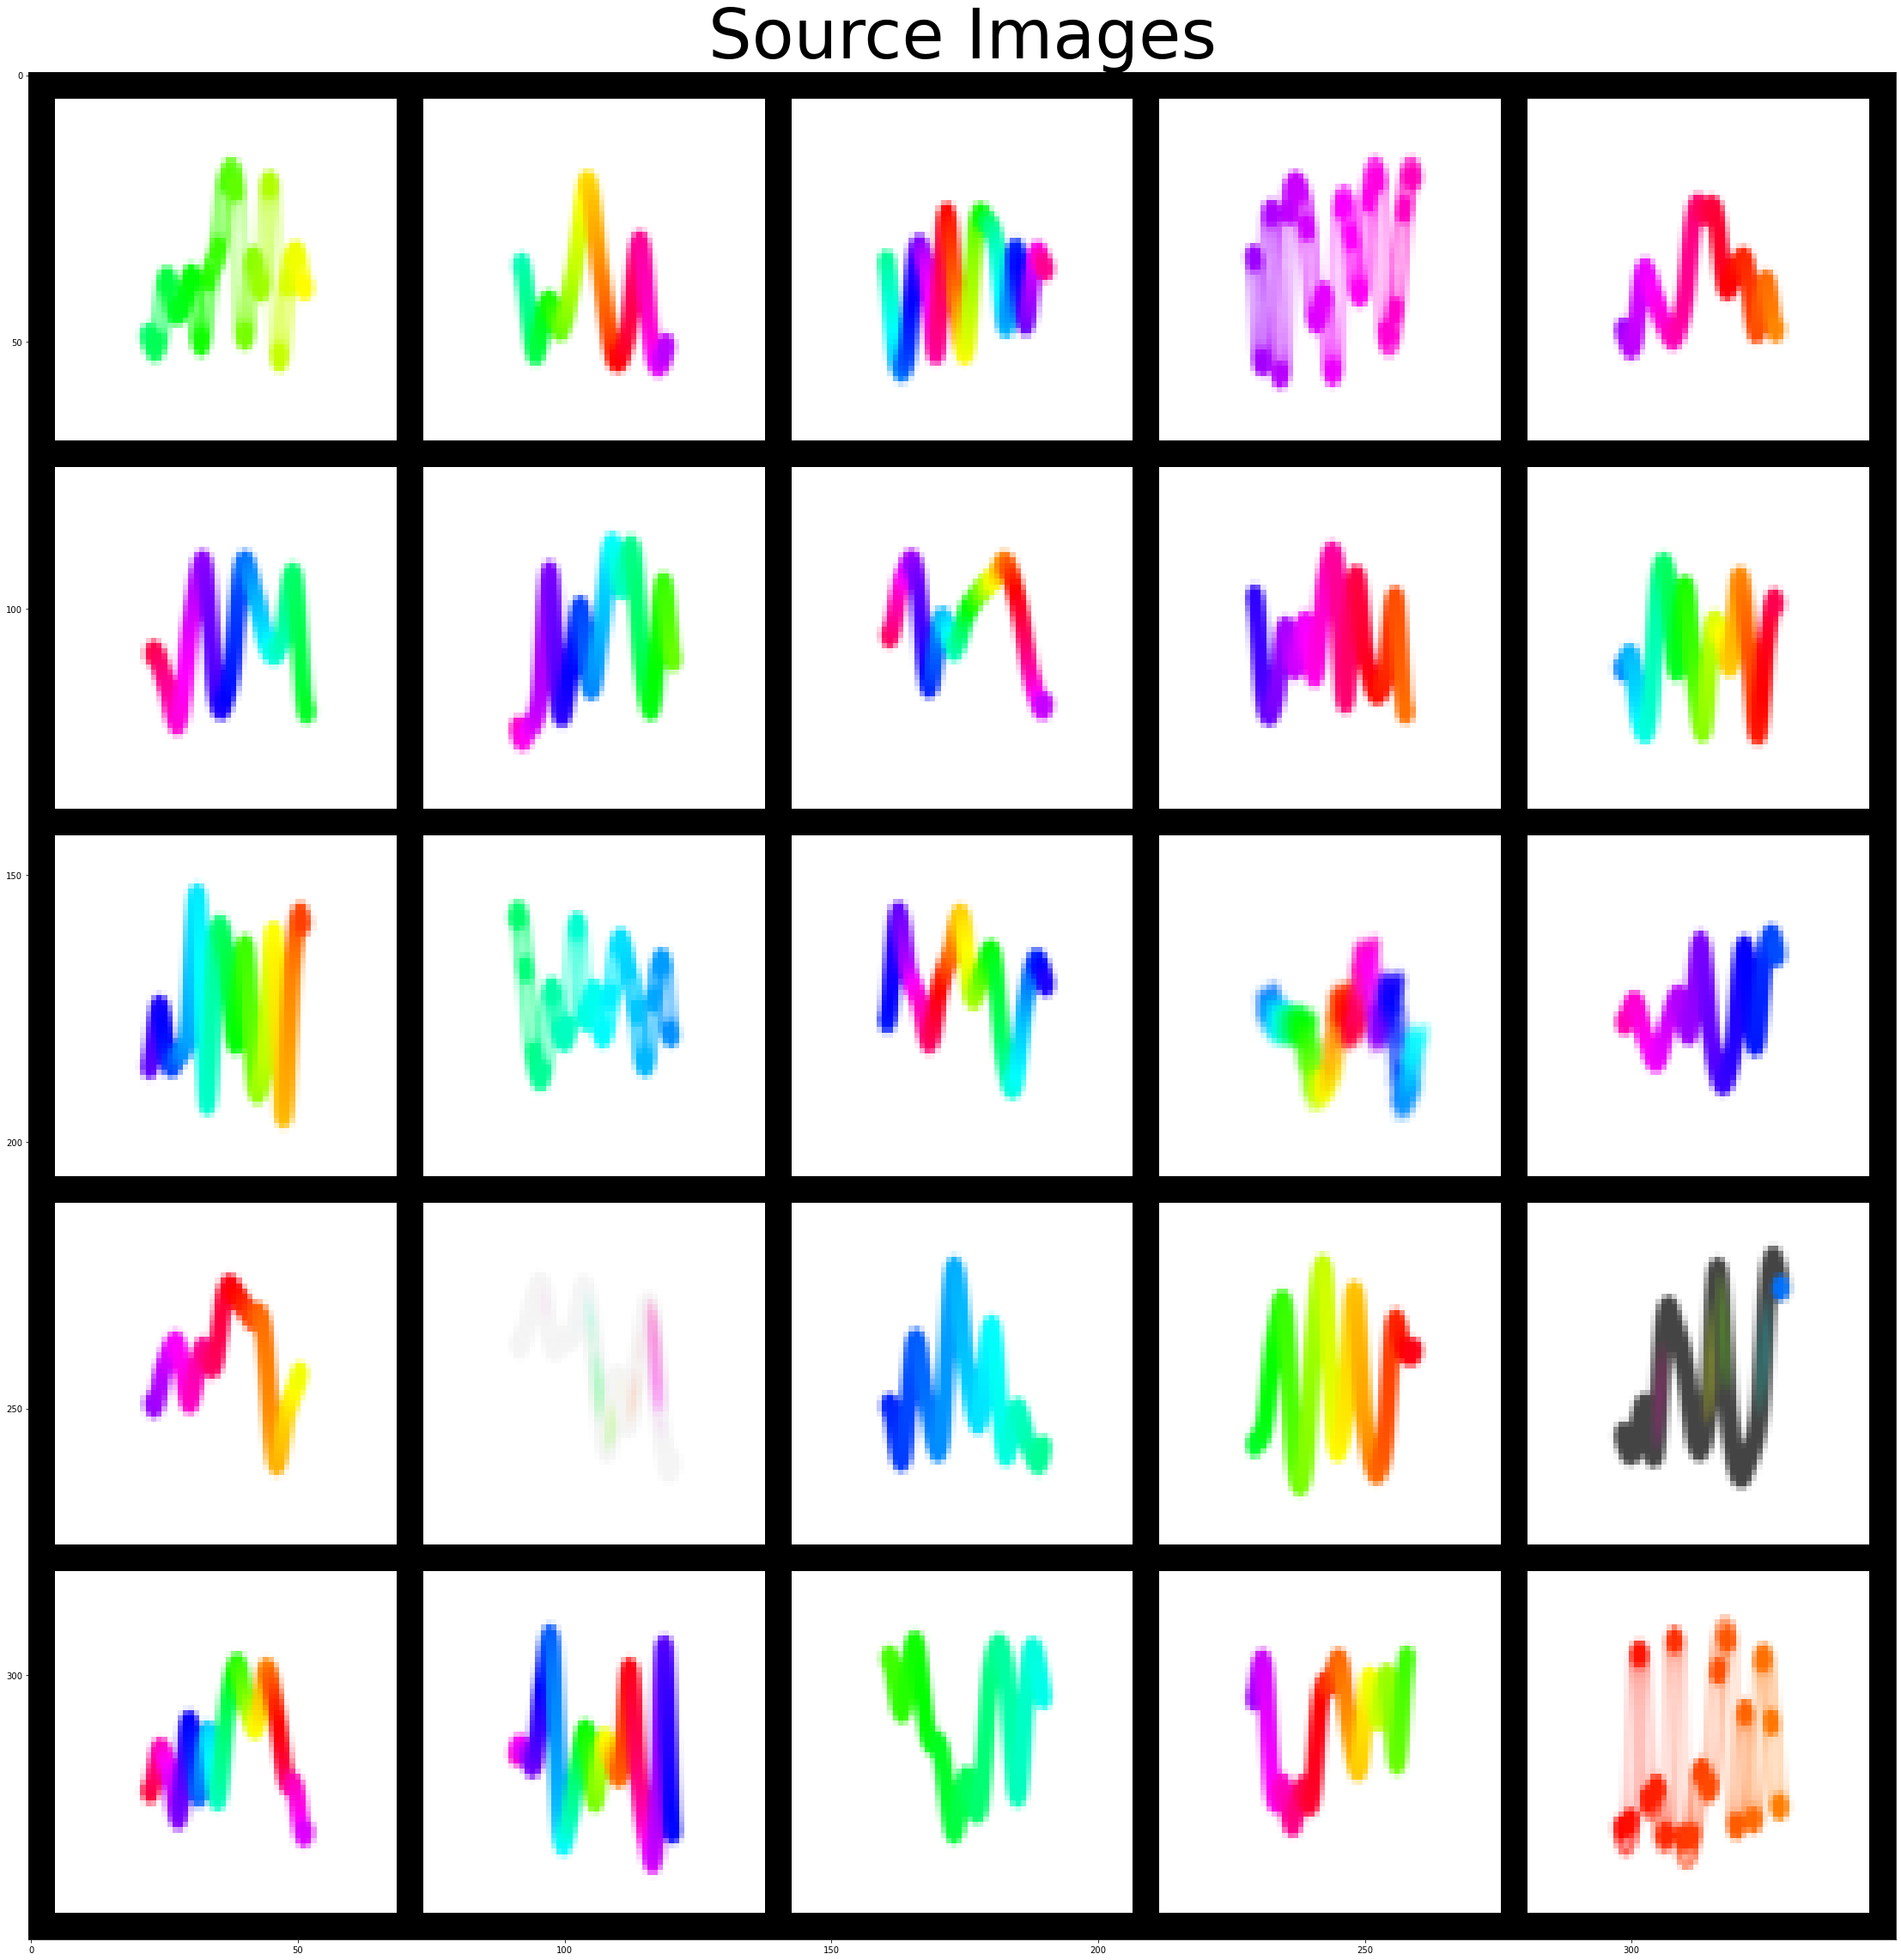

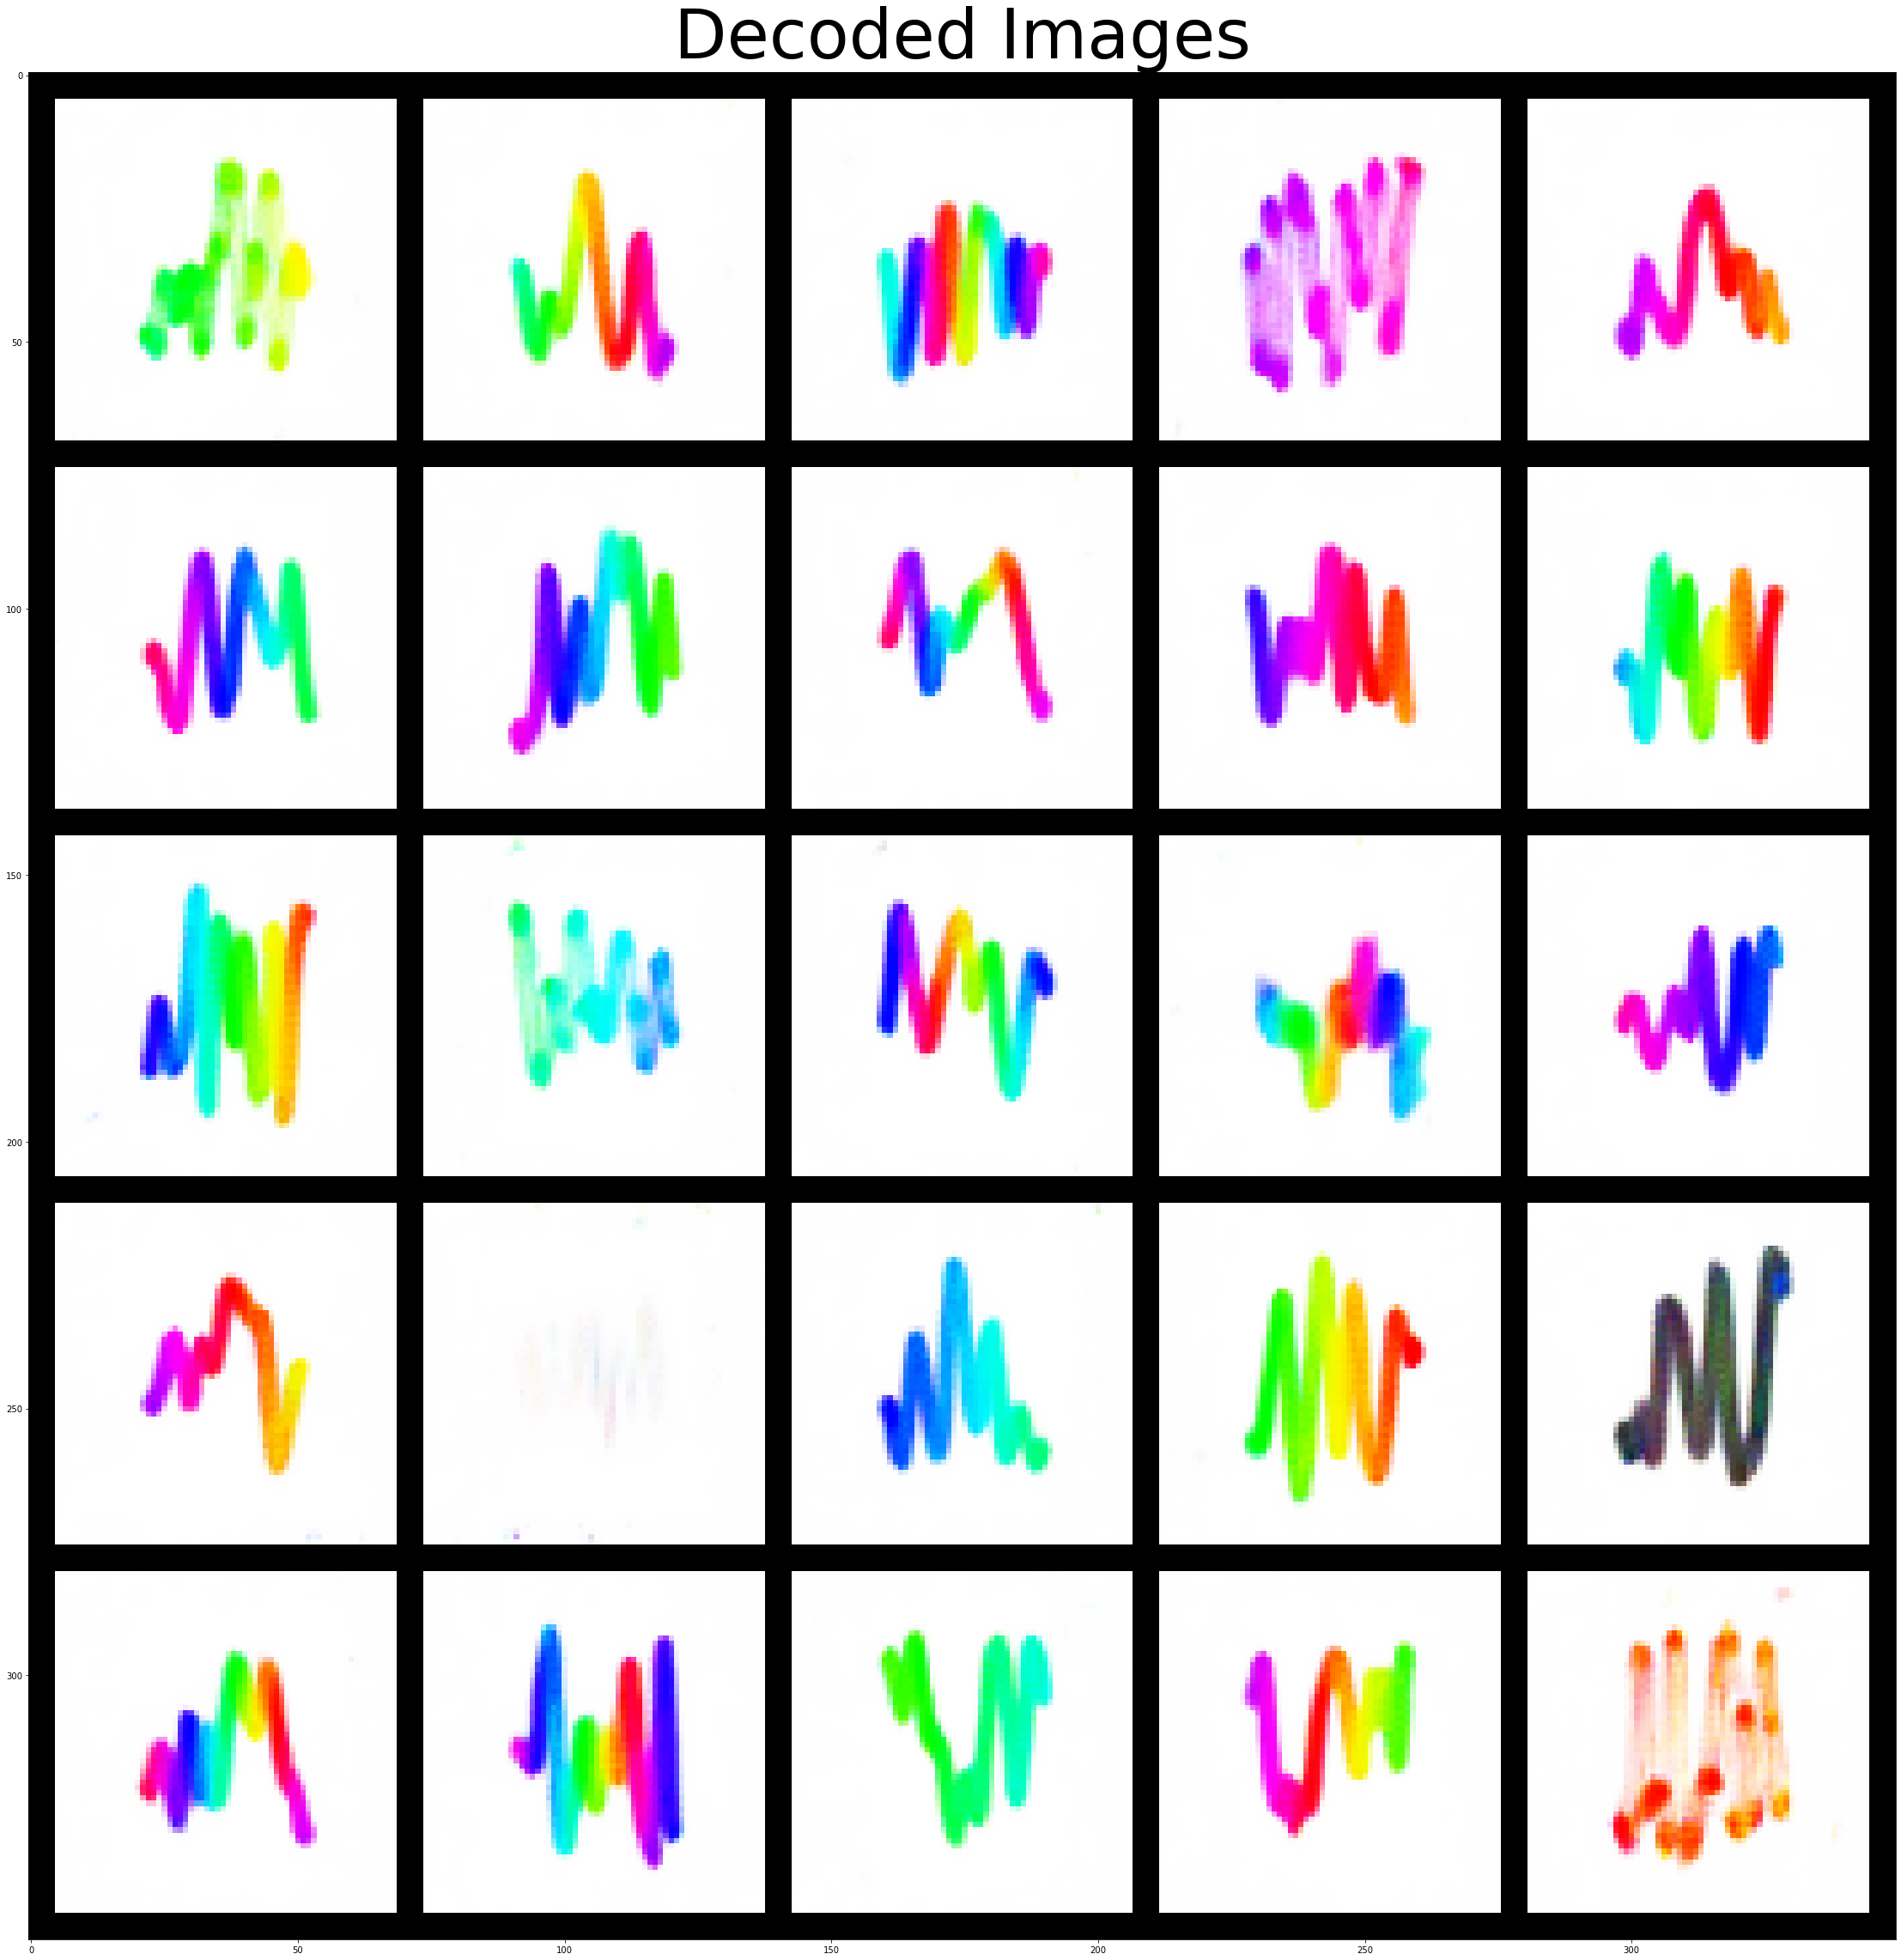

In [16]:
#here we test the autoencoder capabilities of the model
def visualise_output(model,images,args):
    model.eval()
    with torch.no_grad():
    
        images = images.to(args.device)
        images, _, _ = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[:25], 5, 5)
        show_image(np_imagegrid,"Decoded Images")        


show_image(torchvision.utils.make_grid(images[:25],5,5),"Source Images")
visualise_output(vae,images[:25],args)   
    

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


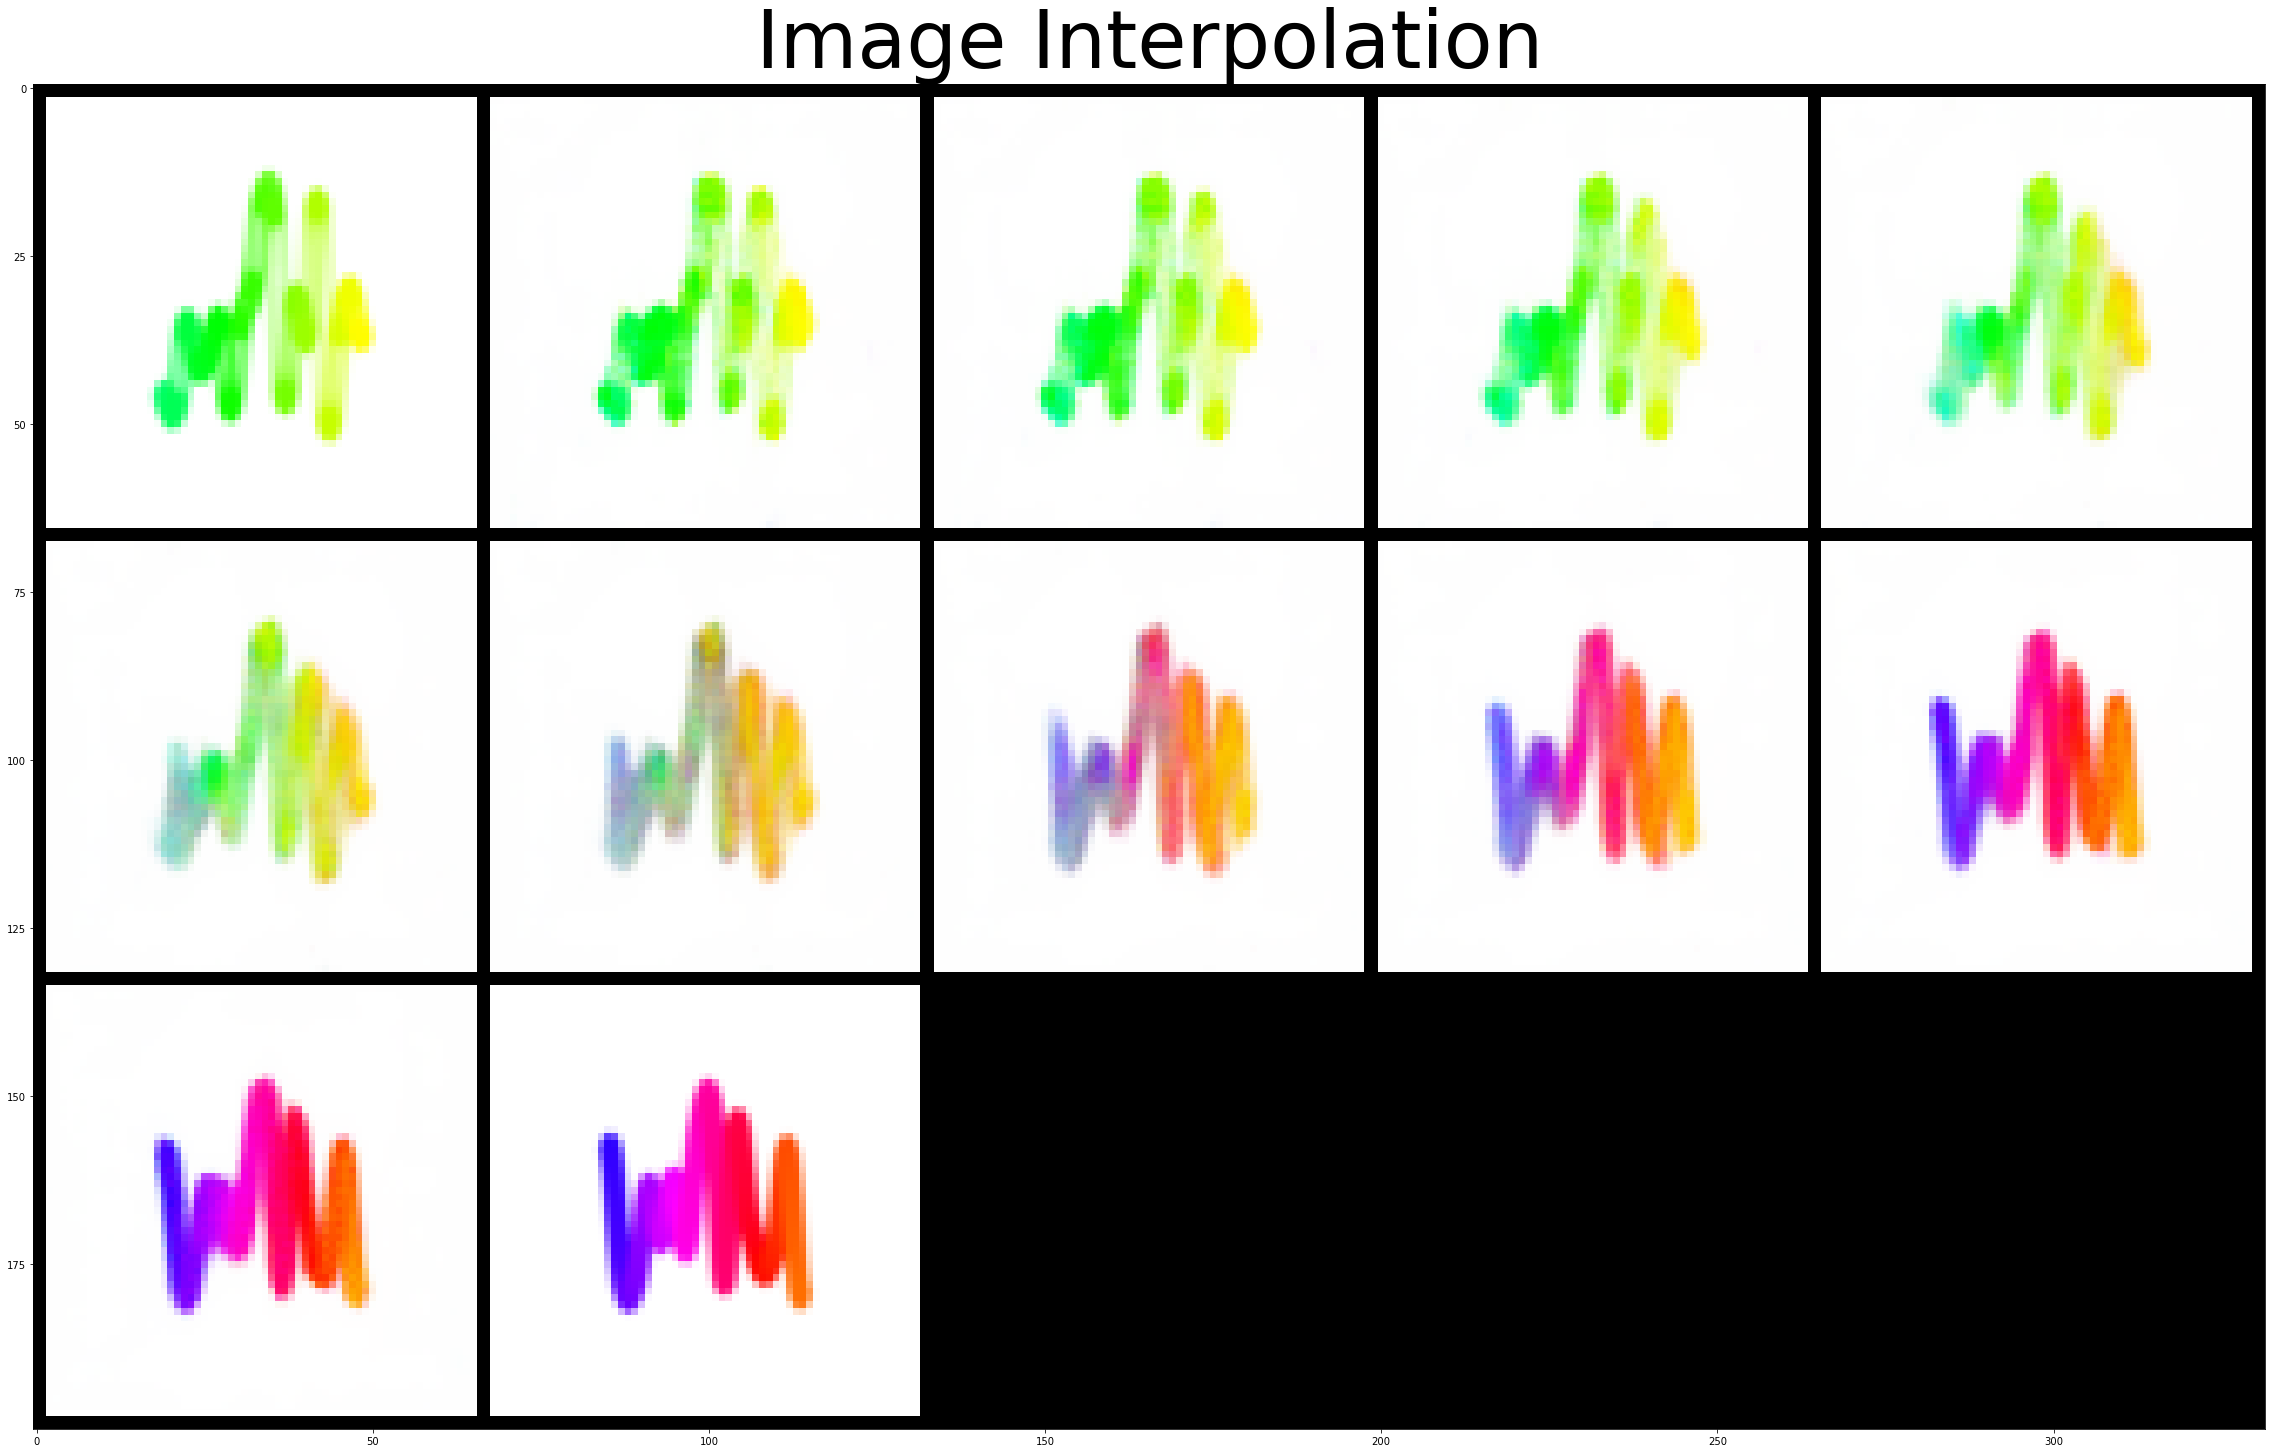

In [17]:
#here we interpolate between two random images

def image_interpolation(model,image1,image2,steps,args,grid_shape=None):
    model.eval()
    if grid_shape == None:
        grid_shape = (5, math.ceil((steps+2)//5))
        
    with torch.no_grad():
        # latent vector of first image
        image1 = image1.to(args.device).unsqueeze(0)
        latent1, _ = model.encoder(image1)
        
        # latent vector of second image
        image2 = image2.to(args.device).unsqueeze(0)
        latent2, _ = model.encoder(image2) 
        
        batches = []
        for idx in range(steps):
            #linear interpolation
            batches += [latent1.lerp(latent2,idx/steps)]
        
        preds = model.decoder(torch.stack(batches))
        images = torch.cat([image1,preds,image2])
        
        np_imagegrid = torchvision.utils.make_grid(images, grid_shape[0], grid_shape[1]).cpu()
        show_image(np_imagegrid,"Image Interpolation")  
        
image_interpolation(vae,images[0],images[8],10,args)
        
        

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


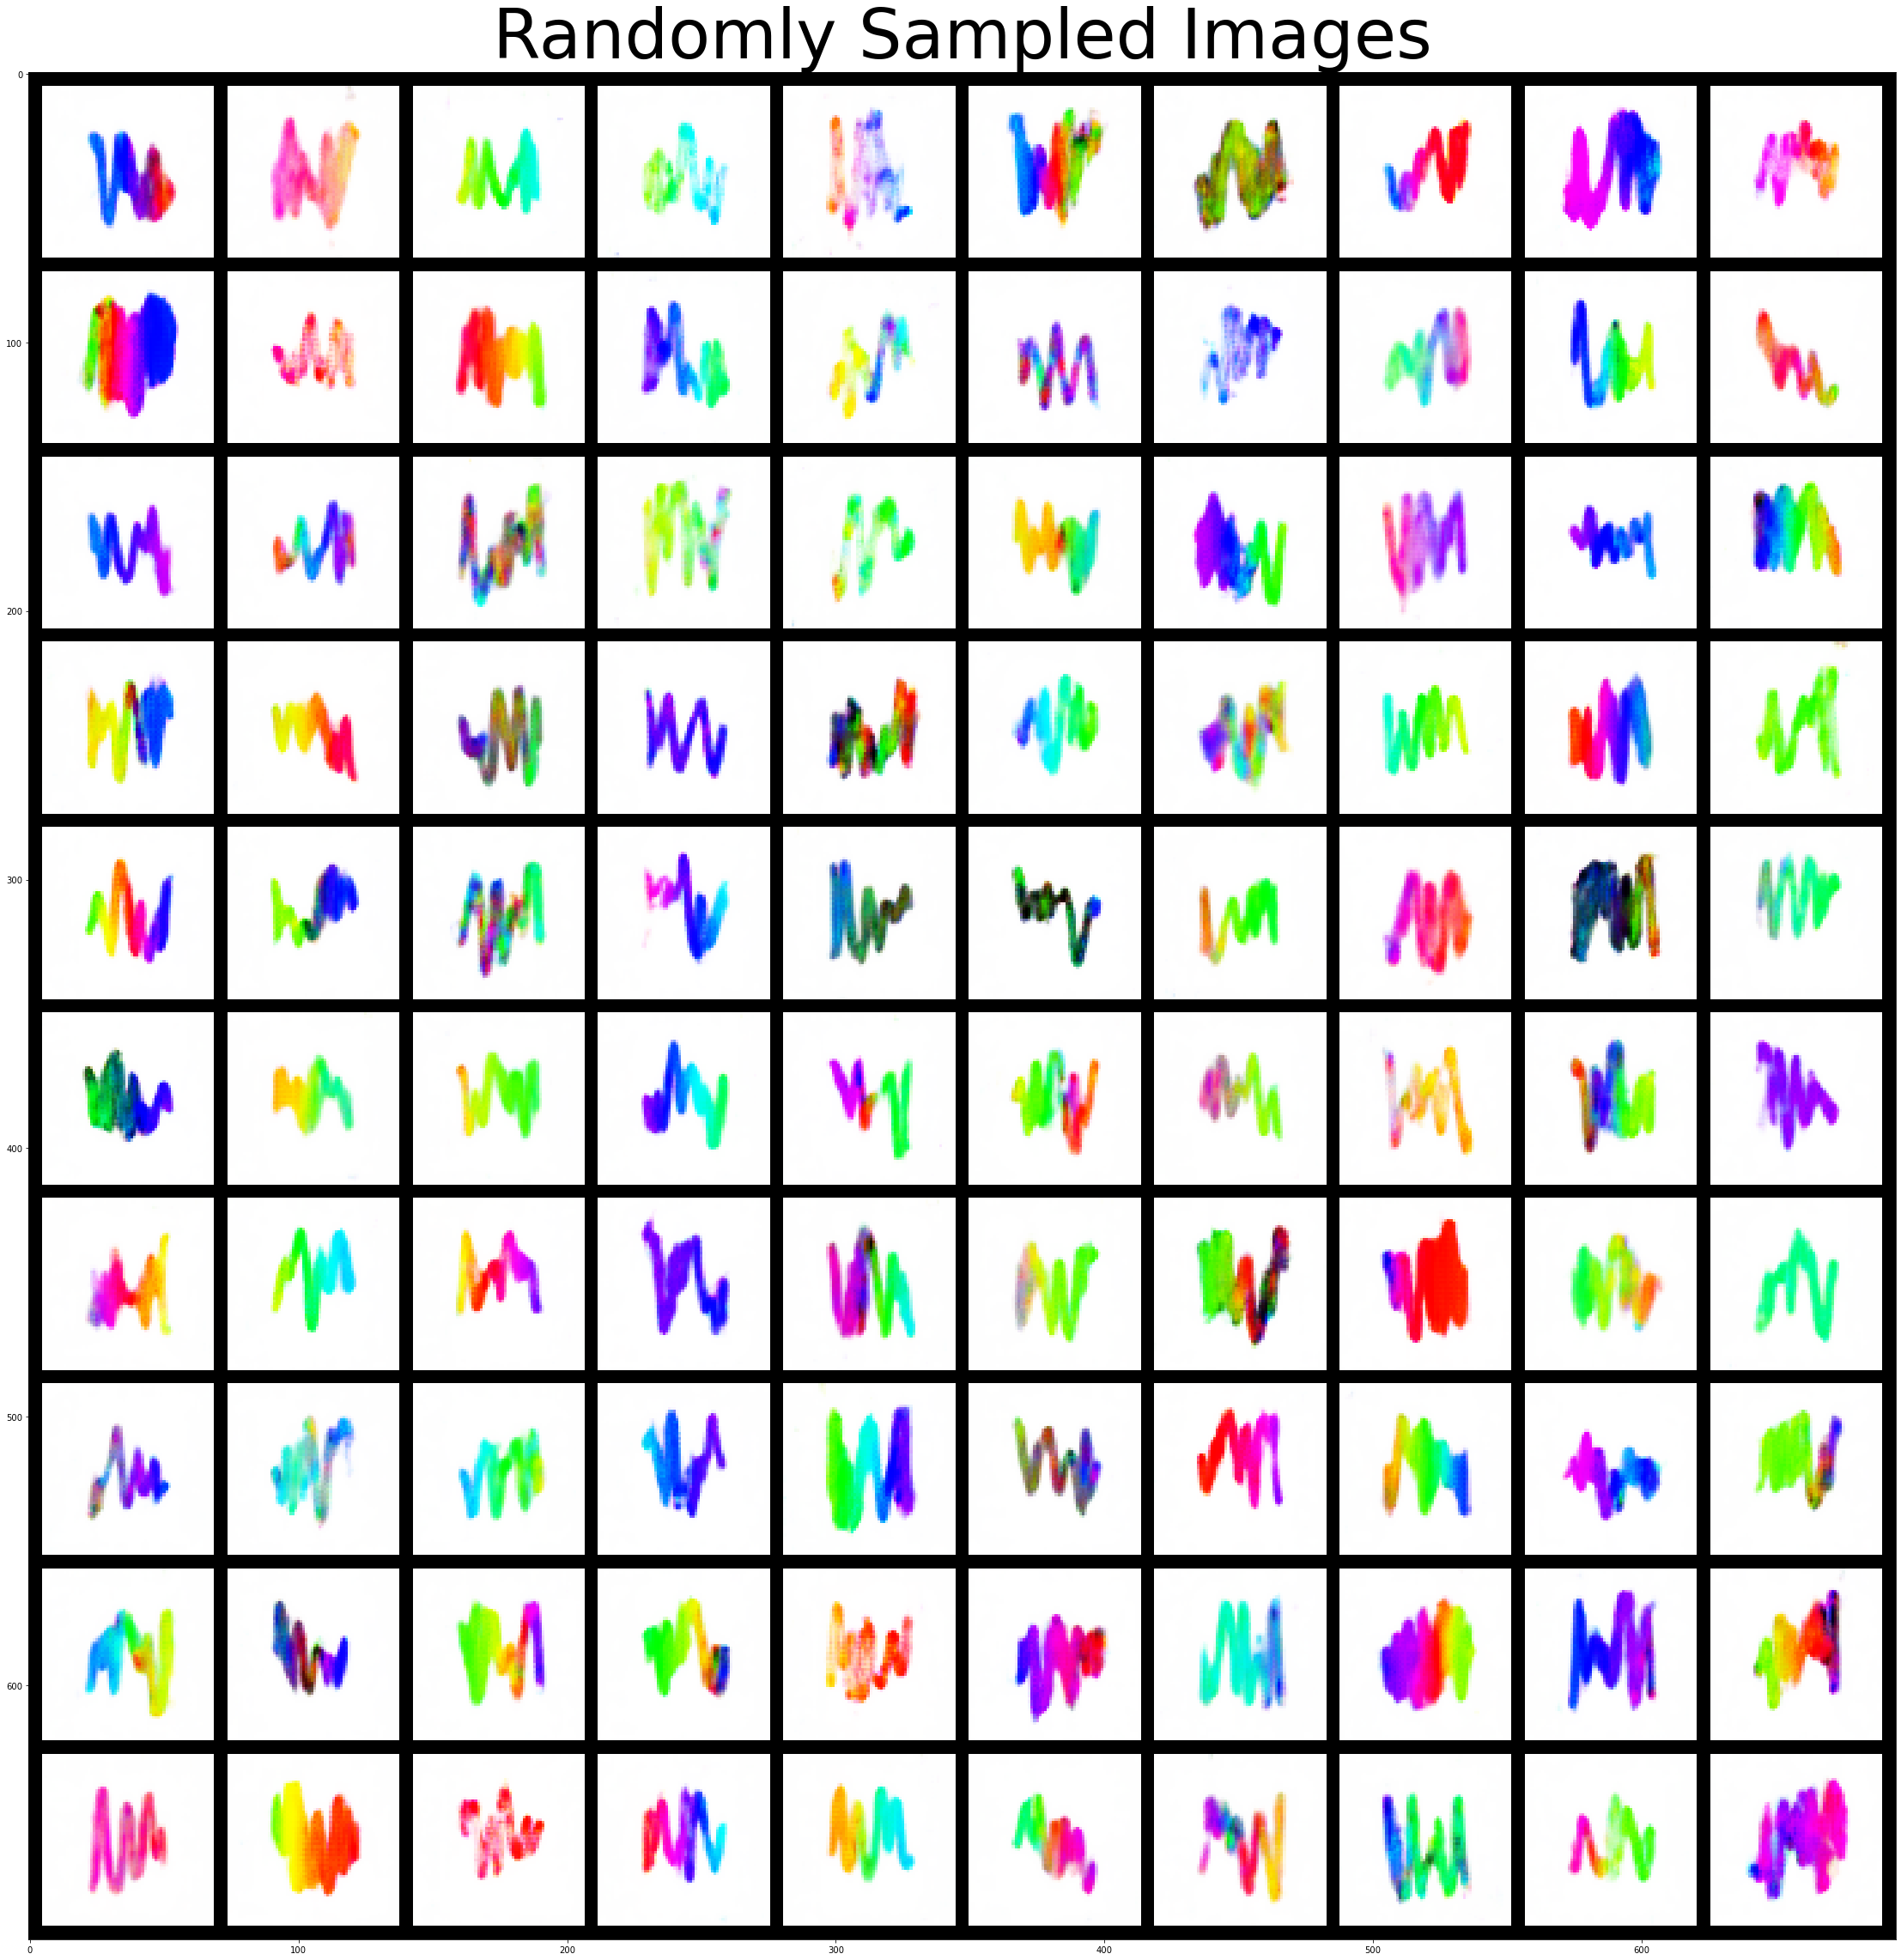

In [18]:
#here we sample random images from the latent space

def sample_random(model,args):
    model.eval()
    with torch.no_grad():
        # sample latent vectors from the normal distribution
        latent = torch.randn(128, args.latent_dims, device=args.device)

        # reconstruct images from the latent vectors
        img_recon = model.decoder(latent)
        img_recon = img_recon.cpu()

        show_image(torchvision.utils.make_grid(img_recon.data[:100],10,5),"Randomly Sampled Images")
        
sample_random(vae,args)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


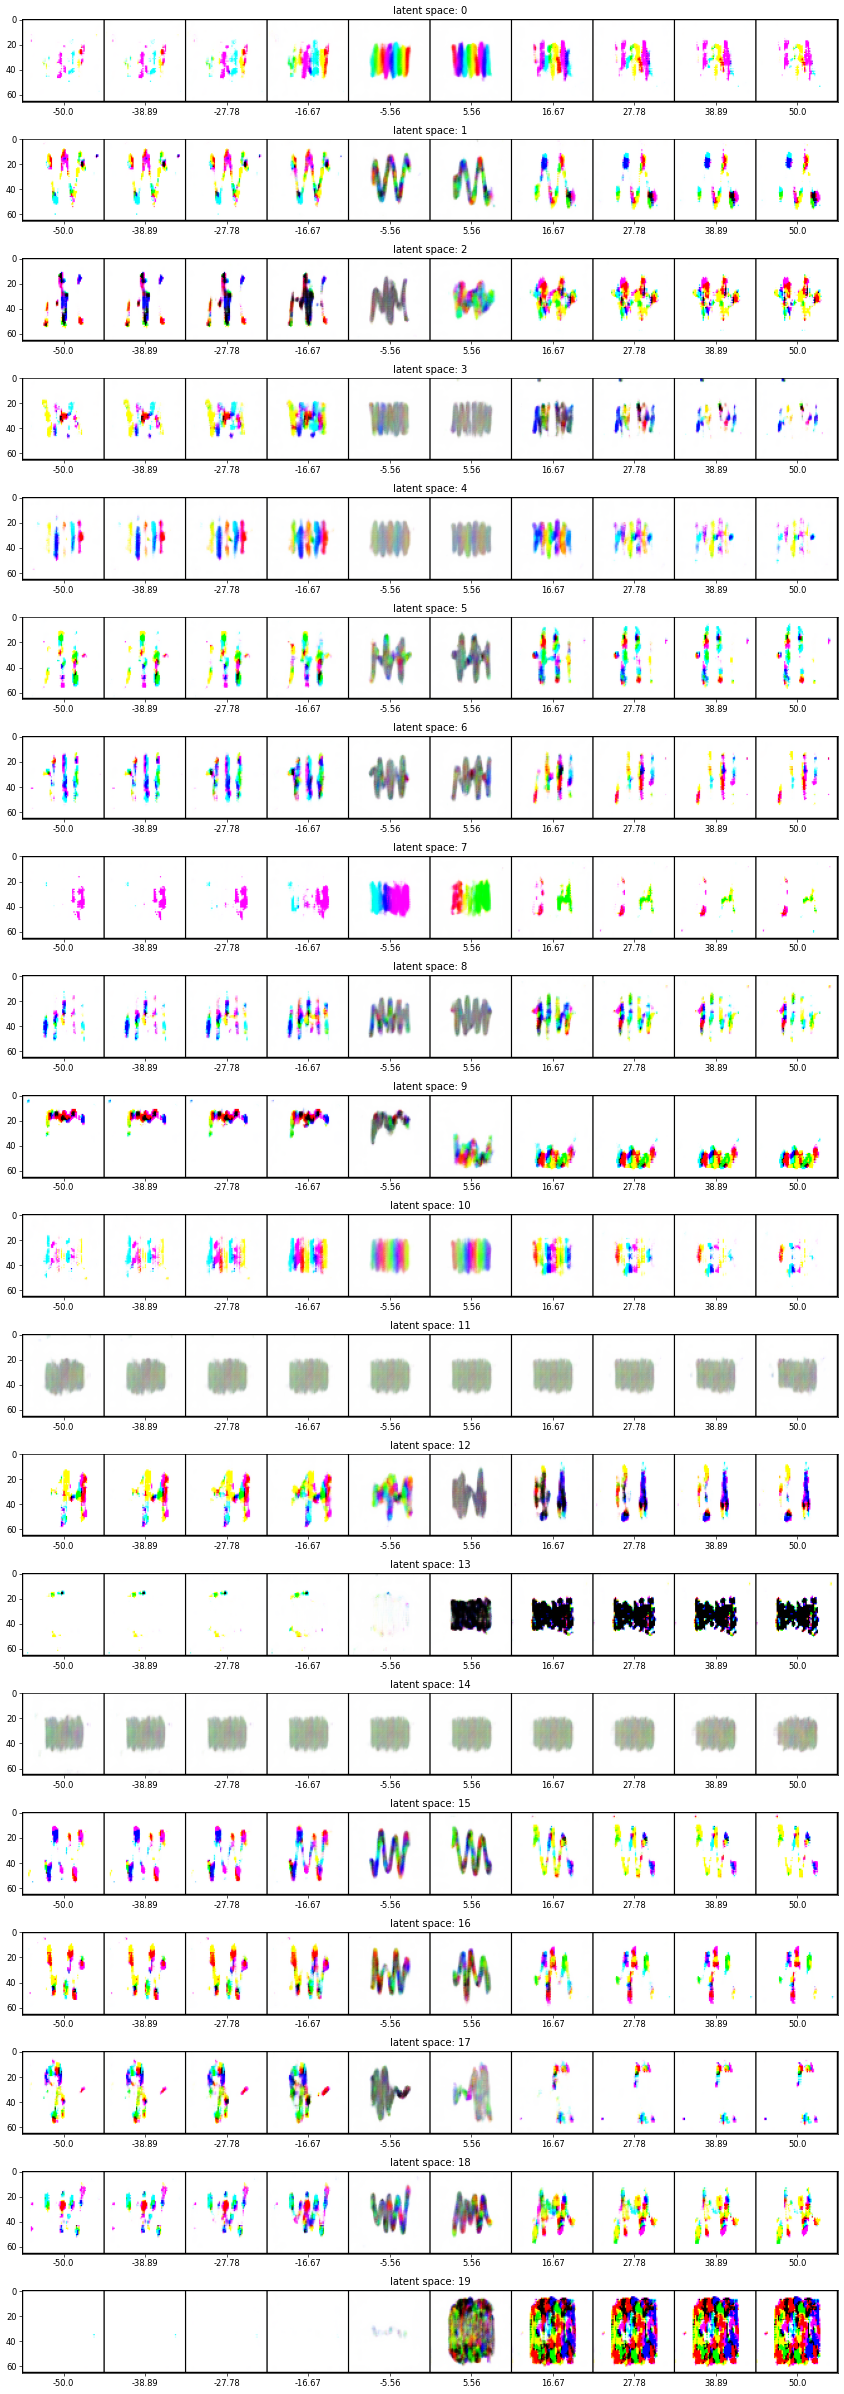

In [19]:
def interpolate_latent_dims(model,args,min_val=-2.5,max_val=2.5,steps=10):
    """ here we outline one latent dim at a time, keeping the other dimensions constant.
        Ideally, with a good separation of the latent space we would see every dimension 
        impacting one specific part of the output, color shape length
    """

    model.eval()
    with torch.no_grad():
        latent_spaces_iterated = min(20,args.latent_dims)
        linspace = torch.linspace(min_val, max_val, steps=steps)
        preds = []

        base_pred = model.decoder(torch.zeros(1,args.latent_dims,device=args.device))[0]

        figure = plt.figure(figsize=(40, 40), dpi=60, )
        for i in range(latent_spaces_iterated):
            base = torch.zeros(steps,args.latent_dims,device=args.device)
            base[:,i] = linspace
            output = model.decoder(base)
                
            # plotting logic
            subplot = figure.add_subplot(latent_spaces_iterated,1,i+1)
            subplot.imshow(torchvision.utils.make_grid(output,steps,1).cpu().permute(1,2,0))
            subplot.set_title(f"latent space: {i}")
            xlim = subplot.get_xlim()[1]
            positions = [(xlim/steps) * i- (xlim/steps)/2 for i in range(1,steps+1)] 
            plt.xticks(positions, [round(v,2) for v in linspace.tolist()])
        
        figure.tight_layout()
        plt.show()
        
interpolate_latent_dims(vae,args,min_val=-50,max_val=50,steps=10)  